# Project - Computational data analysis

# Topic - Linear regression model fitting Miles per gallon dataset 

In [37]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from mlxtend.feature_selection import SequentialFeatureSelector #as sfs
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mpg_data = pd.read_csv(r"D:\Masters\sem1\computationalAnalysis\auto-mpg.csv")

# Data Exploration

In [39]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [40]:
# mpg_data['model_year'].value_counts()

In [41]:
mpg_data.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [42]:
mpg_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [43]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Changing variable names for convenience**

In [44]:
mpg_data = mpg_data.rename({'model year': 'model_year', 'car name': 'car_name'}, axis=1)

**cleaning the faulty data**

In [45]:
mpg_data.loc[mpg_data['horsepower']=='?', 'horsepower'] = np.nan

In [46]:
mpg_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [47]:
mpg_data = mpg_data.dropna()

mpg_data['horsepower']=mpg_data['horsepower'].astype('int64')

# Plotting each variable against mpg to understand relationship

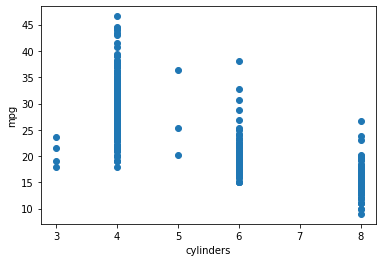

In [48]:
# Plot cylinders against mpg
plt.scatter(mpg_data.cylinders, mpg_data.mpg)

plt.xlabel("cylinders")
plt.ylabel("mpg")
# To show the plot
plt.show()

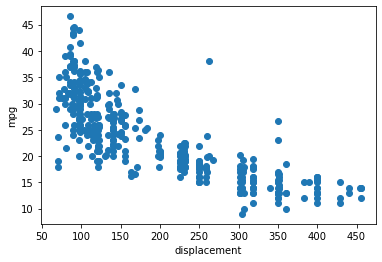

In [49]:
# Plot displacement against mpg
plt.scatter(mpg_data.displacement, mpg_data.mpg)

plt.xlabel("displacement")
plt.ylabel("mpg")
# To show the plot
plt.show()

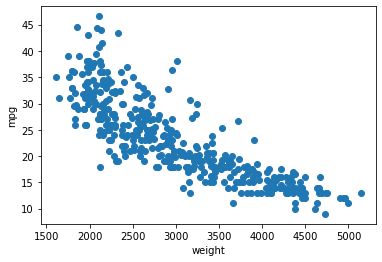

In [50]:
# Plot weight against mpg
plt.scatter(mpg_data.weight, mpg_data.mpg)

plt.xlabel("weight")
plt.ylabel("mpg")
# To show the plot
plt.show()

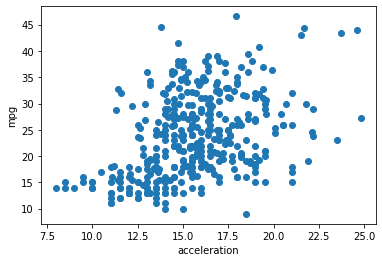

In [51]:
# Plot acceleration against mpg
plt.scatter(mpg_data.acceleration, mpg_data.mpg)

plt.xlabel("acceleration")
plt.ylabel("mpg")
# To show the plot
plt.show()

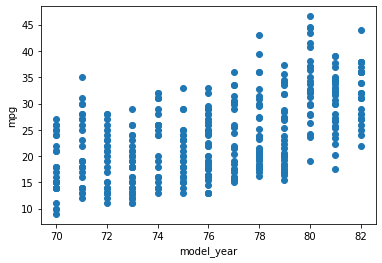

In [52]:
# Plot model_year against mpg
plt.scatter(mpg_data.model_year, mpg_data.mpg)

plt.xlabel("model_year")
plt.ylabel("mpg")
# To show the plot
plt.show()

In [53]:
features = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model_year']

# Relation among each variable

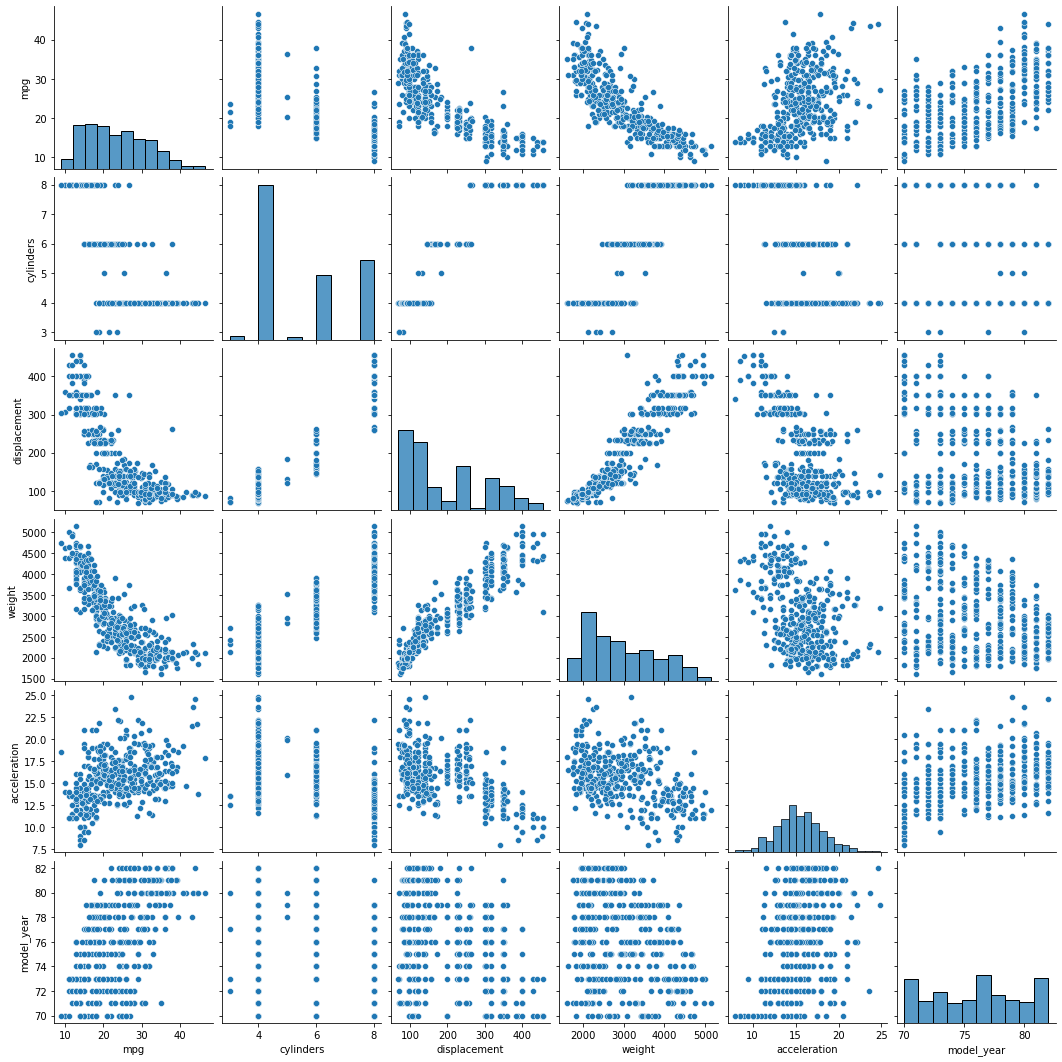

In [54]:
#pair plot
sns.pairplot(mpg_data[features])

In [55]:
#Correlation
corr = mpg_data.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [56]:
#Correlation with output variable
cor_target = abs(corr["mpg"])
#Selecting highly correlated features
cor_target[cor_target>0.5]

mpg             1.000000
cylinders       0.777618
displacement    0.805127
horsepower      0.778427
weight          0.832244
model_year      0.580541
origin          0.565209
Name: mpg, dtype: float64

**Converting categorical variable into dummy variables**

In [57]:
mpg_data.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [58]:
mpg_data = pd.get_dummies(mpg_data, columns=['origin'])
mpg_data = pd.get_dummies(mpg_data, columns=['cylinders'])
mpg_data

,mpg,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,buick skylark 320,1,0,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,plymouth satellite,1,0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,amc rebel sst,1,0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,ford torino,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82,ford mustang gl,1,0,0,0,1,0,0,0
394,44.0,97.0,52,2130,24.6,82,vw pickup,0,1,0,0,1,0,0,0
395,32.0,135.0,84,2295,11.6,82,dodge rampage,1,0,0,0,1,0,0,0
396,28.0,120.0,79,2625,18.6,82,ford ranger,1,0,0,0,1,0,0,0


In [59]:
# #Correlation
# corr = mpg_data.corr()
# corr

In [60]:
# #Correlation with output variable
# cor_target = abs(corr["mpg"])
# #Selecting highly correlated features
# cor_target[cor_target>0.5]

In [61]:
mpg_data

,mpg,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,18.0,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,buick skylark 320,1,0,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,plymouth satellite,1,0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,amc rebel sst,1,0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,ford torino,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,140.0,86,2790,15.6,82,ford mustang gl,1,0,0,0,1,0,0,0
394,44.0,97.0,52,2130,24.6,82,vw pickup,0,1,0,0,1,0,0,0
395,32.0,135.0,84,2295,11.6,82,dodge rampage,1,0,0,0,1,0,0,0
396,28.0,120.0,79,2625,18.6,82,ford ranger,1,0,0,0,1,0,0,0


# Data preparation

In [62]:
#Dropping variables that are less correlated with output mpg
#Independent variable 
x = mpg_data.drop(['mpg','car_name'], axis=1)

In [63]:
#Dependent variable
y = mpg_data['mpg']

In [64]:
x.shape, y.shape

((392, 13), (392,))

In [65]:
# Train and test data split with 70:30 percent ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((274, 13), (274,), (118, 13), (118,))

## Standardizing

In [74]:
# #Standardizing the data before fitting the model
# scaler = StandardScaler()
xtrain_cols = X_train.columns
# X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=xtrain_cols)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=xtrain_cols)

## Variable selection with Random Forest

In [75]:
rf = RandomForestRegressor()

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor()

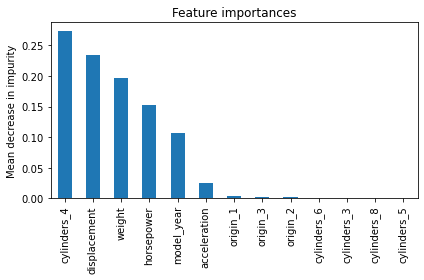

In [77]:
forest_importances = pd.Series(rf.feature_importances_, index=xtrain_cols)\
                    .sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Lets remove all variables post acceleration since they seem not important

In [78]:
final_cols = ['cylinders_4','displacement','weight','horsepower','model_year','acceleration']
X_train_selected= X_train[final_cols]
X_test_selected = X_test[final_cols]

# Linear Regression

In [79]:
#Train the model
lr_model = LinearRegression().fit(X_train, y_train)

In [80]:
#Predict the model on test data
y_pred = lr_model.predict(X_test)

In [81]:
# Intercept and coefficients for all independent features
print(f'intercept = {lr_model.intercept_}')
print(f'betas = {lr_model.coef_}') 
print(f'modelScoreTrain = {lr_model.score(X_train, y_train)}')
print(f'modelScoreTest = {lr_model.score(X_test, y_test)}')
print('testRMSE: {0}'.format(mean_squared_error(y_test, y_pred)))

intercept = -11.90434972051628
betas = [ 0.0210402  -0.04158813 -0.00526046  0.05996976  0.64615133 -1.4370974
  0.3640465   1.0730509  -2.97831535  2.9877064  -0.24416194 -0.52447201
  0.7592429 ]
modelScoreTrain = 0.8545060365639782
modelScoreTest = 0.8077473275598372
testRMSE: 14.638383579515766


# Linear Regression with selected variables

In [82]:
#Train the model
lr_model_selected = LinearRegression().fit(X_train_selected, y_train)

In [83]:
#Predict the model on test data
y_pred_selected = lr_model_selected.predict(X_test_selected)

In [84]:
# Intercept and coefficients for all independent features
print(f'intercept = {lr_model_selected.intercept_}')
print(f'betas = {lr_model_selected.coef_}') 
print(f'modelScore = {lr_model_selected.score(X_train_selected, y_train)}')
print(f'modelScore = {lr_model_selected.score(X_test_selected, y_test)}')
print('testRMSE: {0}'.format(mean_squared_error(y_test, y_pred_selected)))

intercept = -14.344481193790301
betas = [ 4.35525329  0.01849573 -0.00532073 -0.02698771  0.64948208  0.06375825]
modelScore = 0.8402791392032725
modelScore = 0.7872064894253179
testRMSE: 16.202391319129507


# Analyzing the results

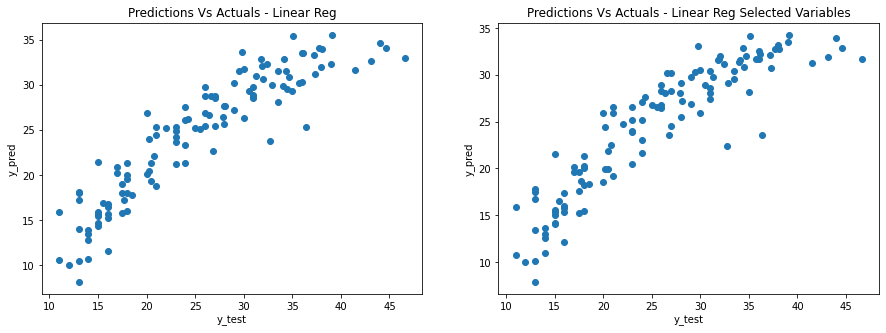

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(y_test, y_pred)
ax[1].scatter(y_test, y_pred_selected)
ax[0].set_title('Predictions Vs Actuals - Linear Reg')
ax[1].set_title('Predictions Vs Actuals - Linear Reg Selected Variables')
for a in ax:
    a.set_ylabel('y_pred')
    a.set_xlabel('y_test')

In [86]:
#Residuals
residuals = y_test - y_pred
residuals

215   -5.064426
184   -0.236937
302    4.926164
304    6.084780
265   -0.544971
         ...   
225   -1.539788
339   -2.190387
357    2.928903
294    1.269269
253   -0.785764
Name: mpg, Length: 118, dtype: float64

In [87]:
residuals_selected = y_test - y_pred_selected
residuals_selected

215   -4.762904
184   -1.743015
302    3.616810
304    6.555099
265   -0.083380
         ...   
225   -2.137578
339   -3.570212
357    3.749054
294    2.483034
253   -1.323921
Name: mpg, Length: 118, dtype: float64

<AxesSubplot:xlabel='mpg', ylabel='Density'>

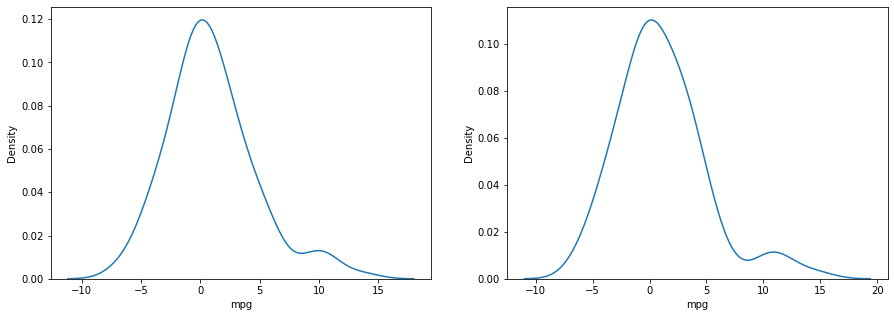

In [88]:
#Plot residuals 
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.kdeplot(residuals, ax=ax[0])
sns.kdeplot(y_test-y_pred_selected, ax=ax[1])

### We can see both the models produced errors that follows almost similar normal distribution centered arounf zero. 

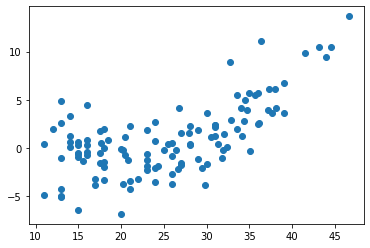

In [89]:
plt.scatter(y_test, residuals) 

In [90]:
#Mean squared error, mean absolute error, root mean squared error
print(f'absoluteMSE: {mean_absolute_error(y_test, y_pred)}')
print(f'RootMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

#Negative Mean of squared error
from sklearn.model_selection import cross_val_score
mse=cross_val_score(LinearRegression(),X_test, y_test, scoring='neg_mean_squared_error', cv=5 )
mean_mse=np.mean(mse)
print(f'NMSE: {mean_mse}')

#R square 
r2score = r2_score(y_test, y_pred)
print(f'RSquare: {r2score}')

#Adjusted R square
Adjr2=(1 - (1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f'AdjustedRSquare: {Adjr2}')

absoluteMSE: 2.7879070849042
RootMSE: 3.826014058980412
NMSE: -14.254640958951356
RSquare: 0.8077473275598372
AdjustedRSquare: 0.7837157435048169


In [91]:
#Mean squared error, mean absolute error, root mean squared error
print(f'absoluteMSE: {mean_absolute_error(y_test, y_pred_selected)}')
print(f'RootMSE: {np.sqrt(mean_squared_error(y_test, y_pred_selected))}')

#Negative Mean of squared error
from sklearn.model_selection import cross_val_score
mse=cross_val_score(LinearRegression(),X_test_selected, y_test, scoring='neg_mean_squared_error', cv=5 )
mean_mse=np.mean(mse)
print(f'NMSE: {mean_mse}')

#R square 
r2score = r2_score(y_test, y_pred_selected)
print(f'RSquare: {r2score}')

#Adjusted R square
Adjr2=(1 - (1-r2score)*(len(y_test)-1)/(len(y_test)-X_test_selected.shape[1]-1))
print(f'AdjustedRSquare: {Adjr2}')

absoluteMSE: 2.9212062692618286
RootMSE: 4.025219412545049
NMSE: -15.809081990423422
RSquare: 0.7872064894253179
AdjustedRSquare: 0.7757041375023621


**As we can see the above metrics, the model is performing well**

**MSE is near to zero and R square and Adjusted R square are near to 1**

# Ridge Regression

In [99]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#lambda
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge=Ridge(alpha = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100])
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train,y_train)


C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.82622e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.75931e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.48937e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.53563e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

GridSearchCV(cv=5,
             estimator=Ridge(alpha=[1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 35, 40, 45, 50, 55, 100]),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [115]:
print(f'ridgeBestParams: {ridge_regressor.best_params_}')
print(f'ridgeRSquare: {ridge_regressor.best_score_}')
#Adjusted R square
ridge_adjr2=(1 - (1-ridge_regressor.best_score_)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f'AdjustedRSquare: {ridge_adjr2}')

ridgeBestParams: {'alpha': 5}
ridgeRSquare: 0.8369476854061009
AdjustedRSquare: 0.8165661460818634


# Lasso Regression

In [113]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
#lambda 
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

lasso_regressor.fit(X_train,y_train)


C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.181e+02, tolerance: 1.097e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.746e+02, tolerance: 1.161e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mowni\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.167e+02, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [116]:
print(f'LassoBestParams: {lasso_regressor.best_params_}')
print(f'Lasso_RSquare: {lasso_regressor.best_score_}')
#Adjusted R square
lasso_adjr2=(1 - (1-lasso_regressor.best_score_)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f'AdjustedRSquare: {lasso_adjr2}')

LassoBestParams: {'alpha': 0.01}
Lasso_RSquare: 0.8373951877242938
AdjustedRSquare: 0.8170695861898305


In [117]:
y_pred_lasso=lasso_regressor.predict(X_test)
y_pred_ridge=ridge_regressor.predict(X_test)

Text(0.5, 1.0, 'Residuals - Ridge Reg')

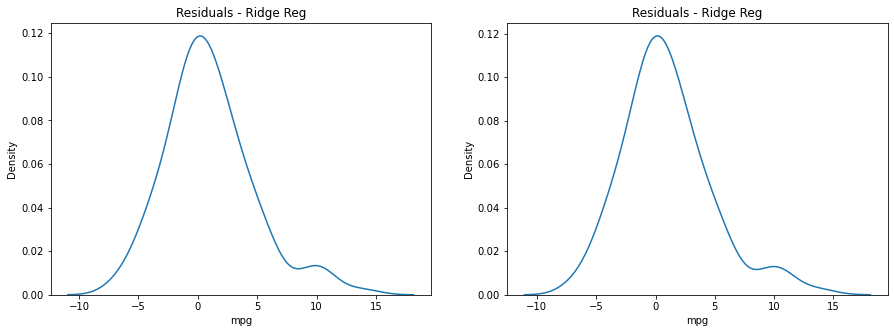

In [127]:
# Plot residuals for ridge and lasso

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.kdeplot(y_test-y_pred_ridge, ax=ax[0])
sns.kdeplot(y_test-y_pred_lasso, ax=ax[1])
ax[0].set_title('Residuals - Ridge Reg')
ax[1].set_title('Residuals - Ridge Reg')


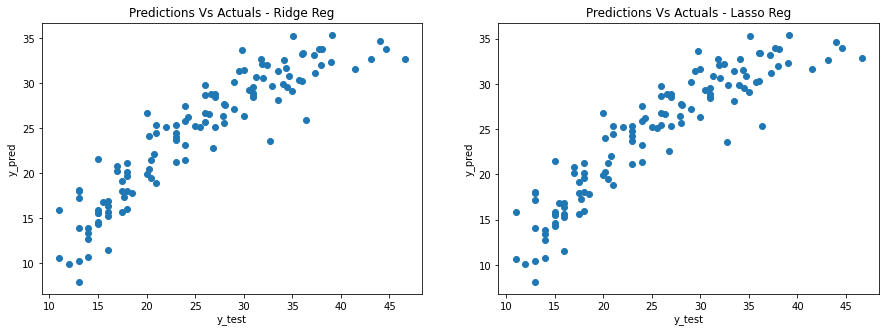

In [131]:

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(y_test, y_pred_ridge)
ax[1].scatter(y_test, y_pred_lasso)
ax[0].set_title('Predictions Vs Actuals - Ridge Reg')
ax[1].set_title('Predictions Vs Actuals - Lasso Reg')
for a in ax:
    a.set_ylabel('y_pred')
    a.set_xlabel('y_test')